In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bitcoin:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4602406%2F7848684%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240412%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240412T174018Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D83dc420f9b645325cab8f5745ac5ba4ad741e206014b91b989d66a59d6cbd9fc09ea1b3f841ad8b7ad9b66c44f4ee22bc6f27d258e3ed939834adcddb5843637e547beeaac2eab8a5ccfd073442fe6f97de662f9dd0e443abc0b6b3afb02bc2214f79dceaab46dc639304653a0362ee2524f8d26ec1577d8913b1a1718fec5b7e1527bbe65ab68d6df6f4c39b36f210c8e4e78055aca93b078c089b7c49d8dddace3971c108bbeda25009091255d66d186999de5069e1f6d86a8be20efb316ca586746266a1491e39571fa3cb6f09fea94a7f6a7db0bb729d9d3443f038fe0e797e9d5fb24985f02f8b1902de7042475703177cbc49ce08293425b6823fd9c91'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 856611 bytes downloaded
Downloaded and uncompressed: bitcoin
Data source import complete.


**Importing necessary Libraries**

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=3ec178b4a0dc81a6c7f0d12419dc172c48d37a0090e72cab5a6f930e38502e16
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

**Importing Dataset**

In [ ]:
data = pd.read_csv('/kaggle/input/bitcoin/btcusdt_1h.csv')

In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['datetime'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Extract features (all columns except the last one)
features = data.iloc[:, 1:]

# Standardize each feature column by column
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Replace the original feature columns with standardized ones
for i, column in enumerate(features.columns):
    if(column!='datetime'):
        data[column] = standardized_features[:, i]

# Now, data contains standardized features
print(data.head())


   index      open      high       low     close    volume
0      0 -0.270629 -0.275122 -0.283534 -0.281139 -0.839447
1      1 -0.281101 -0.281801 -0.297347 -0.299426 -0.866711
2      2 -0.299390 -0.291697 -0.294828 -0.292294 -0.845979
3      3 -0.292251 -0.280943 -0.289746 -0.287814 -0.850081
4      4 -0.286376 -0.280273 -0.287930 -0.277100 -0.886311


**Creating Custom Dataset**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

class CustomDataset_LSTM(Dataset):
    def __init__(self, data):
        self.data = data.values
        self.features = self.data[:, :-1].astype(np.float32)  # All columns except the last one
        self.targets = self.data[:, -1].astype(np.float32)     # Last column is the target (volume)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


**Creating LSTM Model**

In [ ]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out[:, -1, :])  # Use only the last output of the sequence

        fc1_out = self.dropout(self.fc1(lstm_out))
        fc2_out = self.dropout(self.fc2(fc1_out))
        output = self.fc3(fc2_out)
        return output


**Training**

In [ ]:
dataset = CustomDataset_LSTM(data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hyperparameters
input_size = dataset.features.shape[1]  # Number of input features
hidden_size = 100  # Number of hidden units
output_size = 1   # Number of output units (volume)

# Initialize model, loss, and optimizer
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    for batch_features, batch_targets in dataloader:
        # Forward pass
        outputs = model(batch_features.unsqueeze(1))
        loss = criterion(outputs.squeeze(), batch_targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/50], Loss: 0.2140
Epoch [20/50], Loss: 0.4293
Epoch [30/50], Loss: 0.3438
Epoch [40/50], Loss: 1.6163
Epoch [50/50], Loss: 0.3247


**Plotting the predictions and original volume**

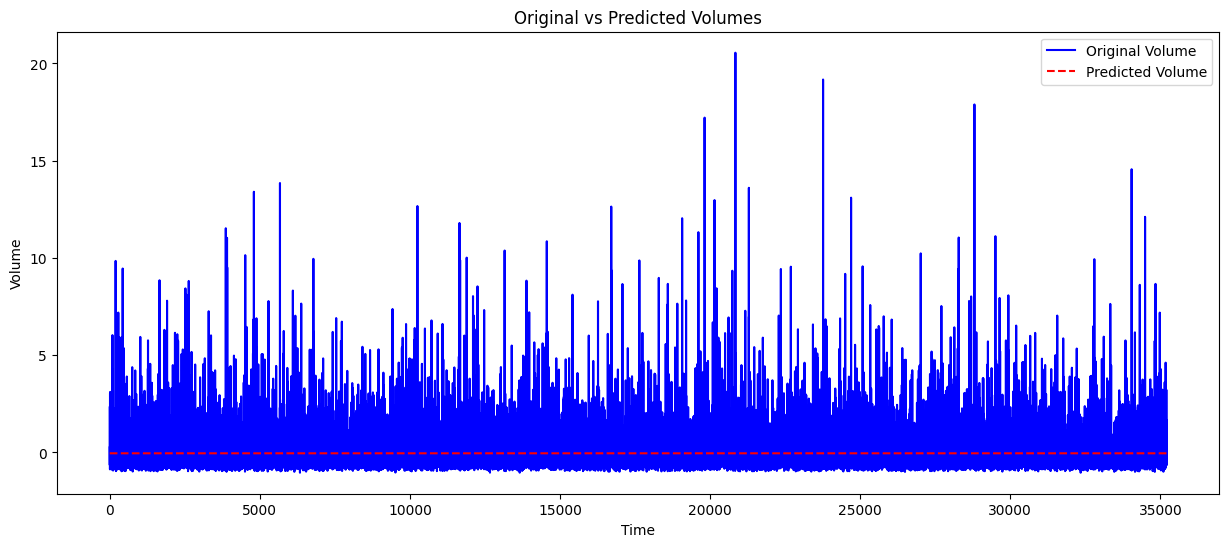

In [ ]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize lists to store original and predicted volumes
original_volumes = []
predicted_volumes = []

# Iterate through the dataset to get original and predicted volumes
with torch.no_grad():
    for batch_features, batch_targets in dataloader:
        # Forward pass
        outputs = model(batch_features.unsqueeze(1))

        # Append original and predicted volumes to the lists
        original_volumes.extend(batch_targets.numpy())
        predicted_volumes.extend(outputs.squeeze().numpy())

# Plotting the line graph
plt.figure(figsize=(15, 6))
plt.plot(original_volumes, label='Original Volume', color='blue')
plt.plot(predicted_volumes, label='Predicted Volume', color='red', linestyle='--')
plt.title('Original vs Predicted Volumes')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


**Creating a simpler LSTM model**

In [ ]:
import torch.nn as nn

class SimpleLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])  # Use only the last output of the sequence
        return output


In [ ]:
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

train_dataset = CustomDataset_LSTM(train_data)
test_dataset = CustomDataset_LSTM(test_data)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Hyperparameters
input_size = 5  # Number of input features
hidden_size = 100  # Number of hidden units
output_size = 1   # Number of output units (volume)

# Initialize model, loss, and optimizer
model = SimpleLSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:

# Training loop with history
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for batch_features, batch_targets in train_dataloader:
        outputs = model(batch_features.unsqueeze(-1))
        loss = criterion(outputs.squeeze(), batch_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_features.size(0)

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # Validation
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_targets in test_dataloader:
            outputs = model(batch_features.unsqueeze(-1))
            loss = criterion(outputs.squeeze(), batch_targets)

            running_loss += loss.item() * batch_features.size(0)

    epoch_loss = running_loss / len(test_dataset)
    val_losses.append(epoch_loss)

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

Epoch [10/500], Training Loss: 0.8621, Validation Loss: 0.7056
Epoch [20/500], Training Loss: 0.5870, Validation Loss: 0.6431
Epoch [30/500], Training Loss: 0.4848, Validation Loss: 0.4883
Epoch [40/500], Training Loss: 0.4495, Validation Loss: 0.3976
Epoch [50/500], Training Loss: 0.4592, Validation Loss: 0.4609
Epoch [60/500], Training Loss: 0.4320, Validation Loss: 0.3702
Epoch [70/500], Training Loss: 0.4405, Validation Loss: 0.3669
Epoch [80/500], Training Loss: 0.3875, Validation Loss: 0.4170
Epoch [90/500], Training Loss: 0.4370, Validation Loss: 0.3666
Epoch [100/500], Training Loss: 0.4214, Validation Loss: 0.3912
Epoch [110/500], Training Loss: 0.4271, Validation Loss: 0.5172
Epoch [120/500], Training Loss: 0.4137, Validation Loss: 0.3948
Epoch [130/500], Training Loss: 0.4114, Validation Loss: 0.3885
Epoch [140/500], Training Loss: 0.4190, Validation Loss: 0.3666
Epoch [150/500], Training Loss: 0.4170, Validation Loss: 0.3453
Epoch [160/500], Training Loss: 0.3818, Validatio

**Plotting**

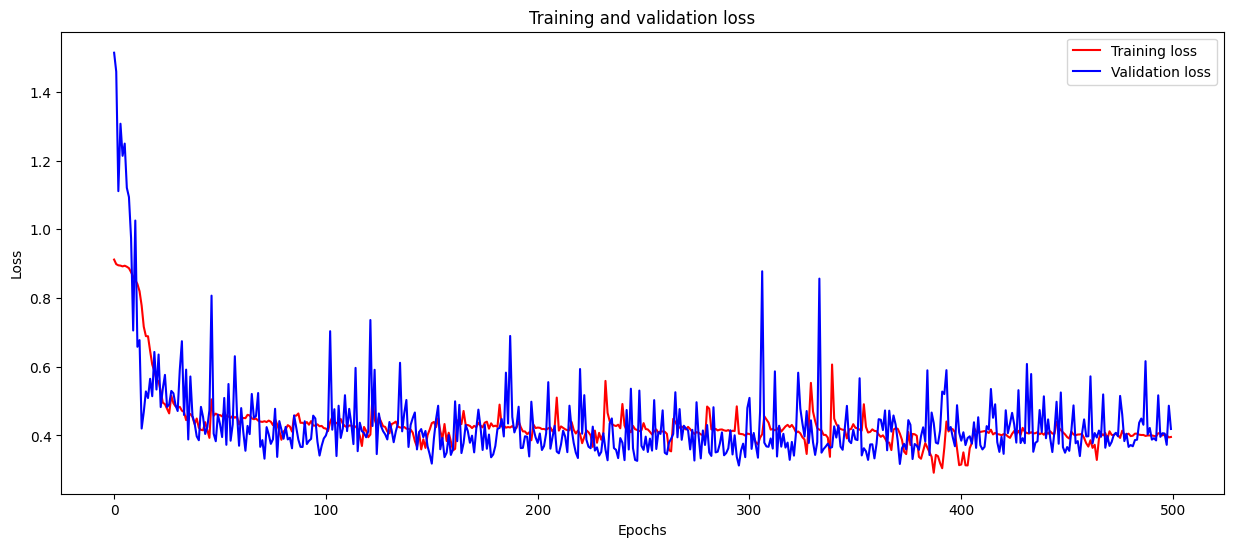

In [ ]:
import matplotlib.pyplot as plt

epochs = range(num_epochs)

plt.figure(figsize=(15, 6))
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


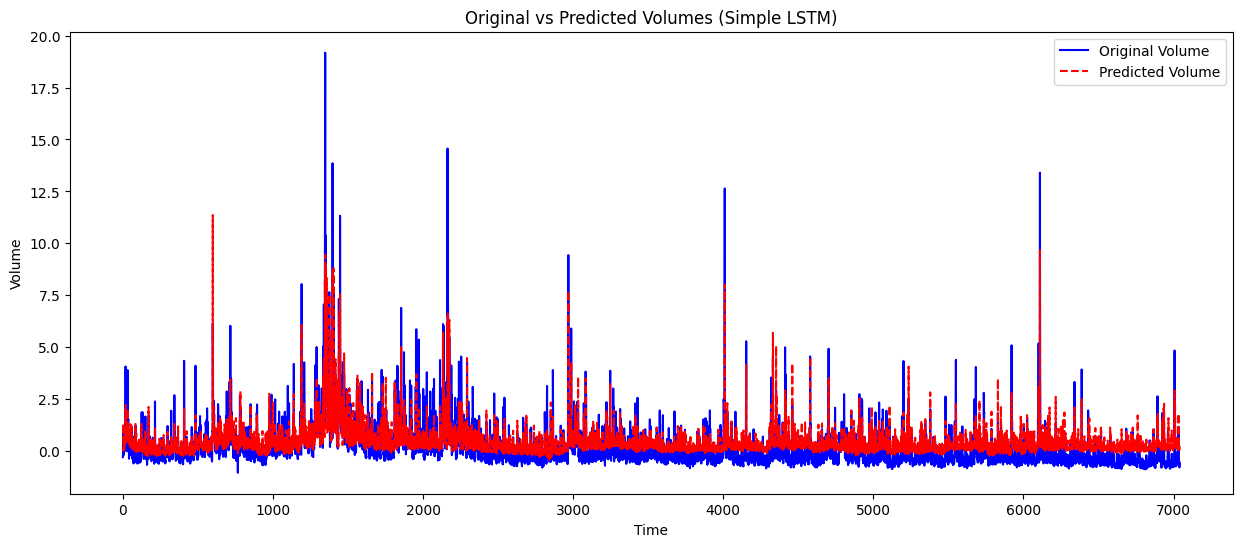

In [ ]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize lists to store original and predicted volumes
original_volumes = test_data.iloc[:, -1].values  # Last column is the target (volume)
predicted_volumes = []

# Iterate through the test dataset to get predicted volumes
with torch.no_grad():
    for batch_features, batch_targets in test_dataloader:
        # Forward pass
        outputs = model(batch_features.unsqueeze(-1))

        # Append predicted volumes to the list
        predicted_volumes.extend(outputs.squeeze().numpy())

# Create a continuous time index for the plots
time_index = np.arange(len(original_volumes))

# Plotting the continuous line graph
plt.figure(figsize=(15, 6))
plt.plot(time_index, original_volumes, label='Original Volume', color='blue')
plt.plot(time_index, predicted_volumes, label='Predicted Volume', color='red', linestyle='--')
plt.title('Original vs Predicted Volumes (Simple LSTM)')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


**Creating a Bi-Directional LSTM**

In [ ]:
import torch.nn as nn

class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BiLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # *2 because of bidirectional LSTM

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])  # Use only the last output of the sequence
        return output


In [ ]:
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

train_dataset = CustomDataset_LSTM(train_data)
test_dataset = CustomDataset_LSTM(test_data)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Hyperparameters
input_size = 1  # Number of input features
hidden_size = 10  # Number of hidden units
output_size = 1   # Number of output units (volume)

# Initialize model, loss, and optimizer
model = BiLSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:


# Training loop with history
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for batch_features, batch_targets in train_dataloader:
        outputs = model(batch_features.unsqueeze(-1))
        loss = criterion(outputs.squeeze(), batch_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_features.size(0)

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # Validation
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_targets in test_dataloader:
            outputs = model(batch_features.unsqueeze(-1))
            loss = criterion(outputs.squeeze(), batch_targets)

            running_loss += loss.item() * batch_features.size(0)

    epoch_loss = running_loss / len(test_dataset)
    val_losses.append(epoch_loss)

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


Epoch [10/500], Training Loss: 0.8919, Validation Loss: 1.2589
Epoch [20/500], Training Loss: 0.8916, Validation Loss: 1.3124
Epoch [30/500], Training Loss: 0.8716, Validation Loss: 1.2896
Epoch [40/500], Training Loss: 0.6406, Validation Loss: 0.9888
Epoch [50/500], Training Loss: 0.5595, Validation Loss: 0.8487
Epoch [60/500], Training Loss: 0.5662, Validation Loss: 0.7081
Epoch [70/500], Training Loss: 0.4451, Validation Loss: 0.5061
Epoch [80/500], Training Loss: 0.4545, Validation Loss: 0.5002
Epoch [90/500], Training Loss: 0.5170, Validation Loss: 0.6066
Epoch [100/500], Training Loss: 0.4873, Validation Loss: 0.4718
Epoch [110/500], Training Loss: 0.4774, Validation Loss: 0.4311
Epoch [120/500], Training Loss: 0.4367, Validation Loss: 0.4666
Epoch [130/500], Training Loss: 0.4208, Validation Loss: 0.3962
Epoch [140/500], Training Loss: 0.3442, Validation Loss: 0.3784
Epoch [150/500], Training Loss: 0.5994, Validation Loss: 0.4937
Epoch [160/500], Training Loss: 0.4595, Validatio

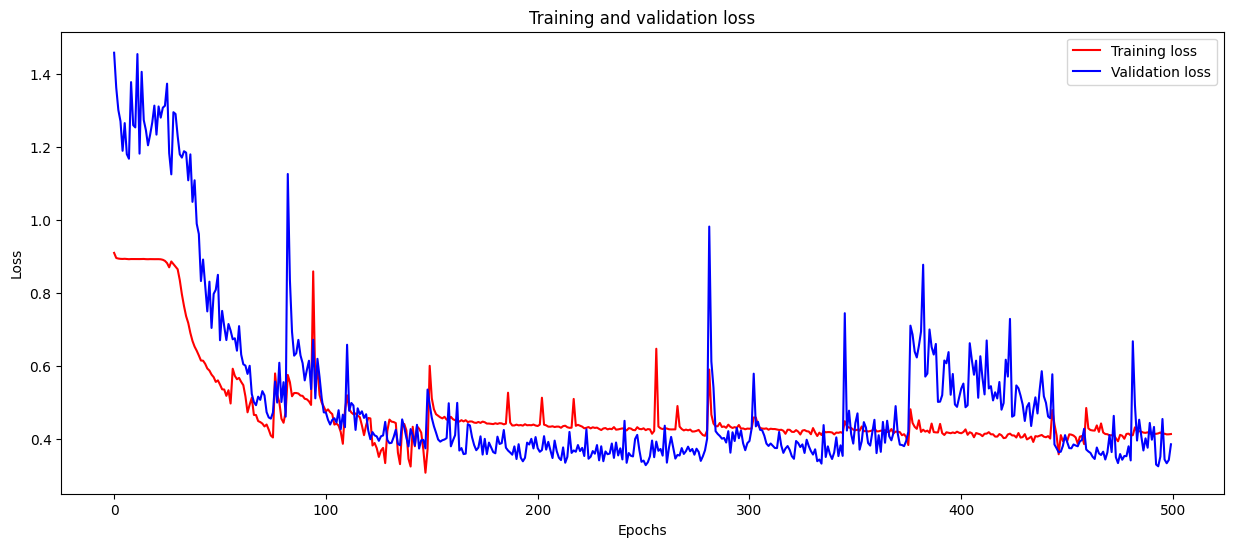

In [ ]:
import matplotlib.pyplot as plt

epochs = range(num_epochs)

plt.figure(figsize=(15, 6))
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


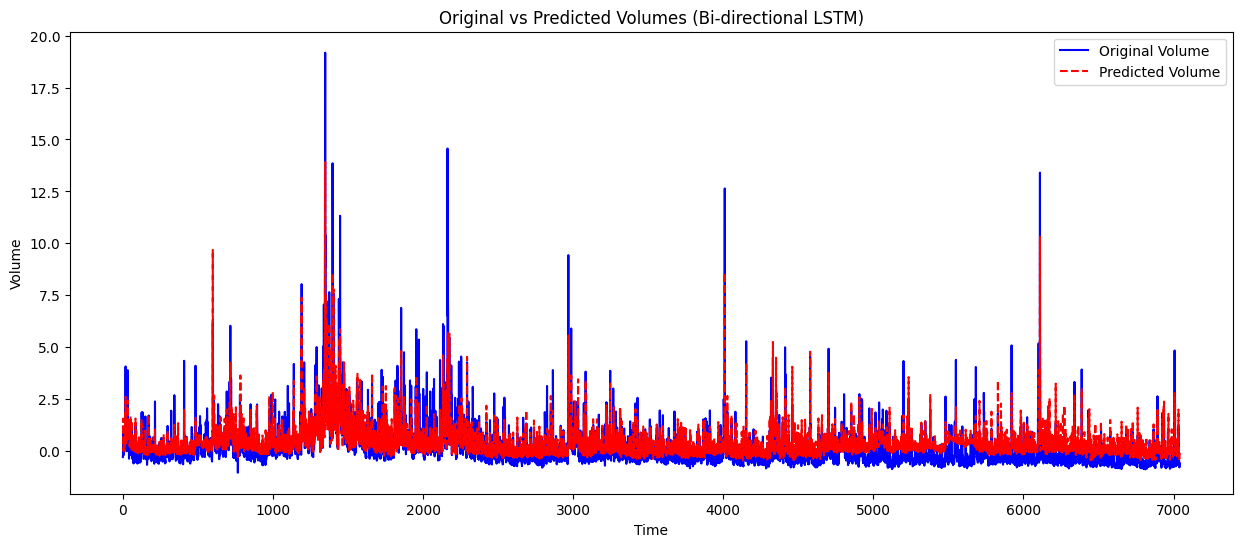

In [ ]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize lists to store original and predicted volumes
original_volumes = test_data.iloc[:, -1].values  # Last column is the target (volume)
predicted_volumes = []

# Iterate through the test dataset to get predicted volumes
with torch.no_grad():
    for batch_features, batch_targets in test_dataloader:
        # Forward pass
        outputs = model(batch_features.unsqueeze(-1))

        # Append predicted volumes to the list
        predicted_volumes.extend(outputs.squeeze().numpy())

# Create a continuous time index for the plots
time_index = np.arange(len(original_volumes))

# Plotting the continuous line graph
plt.figure(figsize=(15, 6))
plt.plot(time_index, original_volumes, label='Original Volume', color='blue')
plt.plot(time_index, predicted_volumes, label='Predicted Volume', color='red', linestyle='--')
plt.title('Original vs Predicted Volumes (Bi-directional LSTM)')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()
